In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import seaborn as sns

In [22]:

data = pd.read_csv('ECG_Cardiac_Features.csv')

print(data.isna())

print(data.isna().sum())




       ecg_id  Patient_ID  Label  Heart Rate  HRV_MeanNN  HRV_SDNN  HRV_RMSSD  \
0       False       False  False       False       False     False      False   
1       False       False  False       False       False     False      False   
2       False       False  False       False       False     False      False   
3       False       False  False       False       False     False      False   
4       False       False  False       False       False     False      False   
...       ...         ...    ...         ...         ...       ...        ...   
20789   False       False  False       False       False     False      False   
20790   False       False  False       False       False     False      False   
20791   False       False  False       False       False     False      False   
20792   False       False  False       False       False     False      False   
20793   False       False  False       False       False     False      False   

       HRV_pNN50  QRS_durat

In [23]:
nan_rows = data[data.isna().any(axis=1)]
print(nan_rows)


       ecg_id  Patient_ID Label  Heart Rate   HRV_MeanNN    HRV_SDNN  \
4           5     17448.0  NORM   66.456900   905.200000   51.018080   
6           7     16193.0  NORM   62.029699   967.555556   18.351506   
15         16     10999.0  NORM   82.332612   730.153846   34.024124   
17         21     17102.0  NORM   75.033581   810.000000   92.912862   
36         42      8039.0  NORM   59.390845  1013.250000   61.893341   
...       ...         ...   ...         ...          ...         ...   
20781   21757     13857.0   HYP  122.812159   505.777778  123.490202   
20782   21758     11171.0  NORM   89.301608   673.428571   33.100579   
20785   21761     13747.0    CD  115.095365   539.294118  111.447165   
20787   21763     13857.0   HYP  109.231086   586.800000  166.941906   
20792   21768     17503.0  STTC  129.773923   484.210526  117.843389   

        HRV_RMSSD  HRV_pNN50  QRS_duration  PR_duration  ...  RR Interval SD  \
4       57.271284  50.000000           NaN        122.0

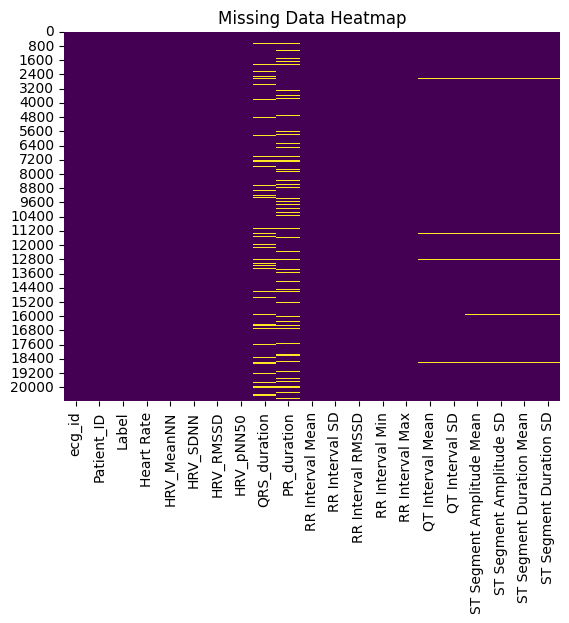

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [25]:


data_cleaned = data.dropna()
data_cleaned = data_cleaned.drop(columns=['Patient_ID'])
data_cleaned = data_cleaned.drop(columns=['ecg_id'])

print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")

print(data_cleaned.isna())

print(data_cleaned.isna().sum())



Original dataset shape: (20794, 21)
Cleaned dataset shape: (15674, 19)
       Label  Heart Rate  HRV_MeanNN  HRV_SDNN  HRV_RMSSD  HRV_pNN50  \
0      False       False       False     False      False      False   
1      False       False       False     False      False      False   
2      False       False       False     False      False      False   
3      False       False       False     False      False      False   
5      False       False       False     False      False      False   
...      ...         ...         ...       ...        ...        ...   
20788  False       False       False     False      False      False   
20789  False       False       False     False      False      False   
20790  False       False       False     False      False      False   
20791  False       False       False     False      False      False   
20793  False       False       False     False      False      False   

       QRS_duration  PR_duration  RR Interval Mean  RR Interval 

In [26]:
print(data_cleaned.columns)

# One-hot encode the 'Label' column
data_cleaned = pd.get_dummies(data_cleaned, columns=['Label'], prefix='', prefix_sep='')

# Print the new columns to confirm

# List of label columns to convert
label_columns = ['CD', 'HYP', 'MI', 'NORM', 'STTC']

# Convert the boolean columns to integers (True -> 1, False -> 0)
data_cleaned[label_columns] = data_cleaned[label_columns].astype(int)

# Print the updated data to verify the changes
print(data_cleaned.head())

data_cleaned.to_csv('ECG_Cardiac_Features_Cleaned.csv', index=False)



Index(['Label', 'Heart Rate', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD',
       'HRV_pNN50', 'QRS_duration', 'PR_duration', 'RR Interval Mean',
       'RR Interval SD', 'RR Interval RMSSD', 'RR Interval Min',
       'RR Interval Max', 'QT Interval Mean', 'QT Interval SD',
       'ST Segment Amplitude Mean', 'ST Segment Amplitude SD',
       'ST Segment Duration Mean', 'ST Segment Duration SD'],
      dtype='object')
   Heart Rate   HRV_MeanNN   HRV_SDNN  HRV_RMSSD  HRV_pNN50  QRS_duration  \
0   63.847119   940.000000  17.320508  22.627417   0.000000    141.714286   
1   47.838174  1258.285714  82.836615  54.546616  42.857143    174.285714   
2   63.822587   940.444444  20.019435  17.606817   0.000000    130.750000   
3   75.152692   800.545455  45.511237  35.185224   9.090909    160.727273   
5   83.286247   722.000000  36.630836  31.211886   8.333333    142.833333   

   PR_duration  RR Interval Mean  RR Interval SD  RR Interval RMSSD  ...  \
0   127.333333        940.000000       16.329

Epoch 1/50


C:\Users\Aditya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4877 - loss: 1.3369 - val_accuracy: 0.5199 - val_loss: 1.2250
Epoch 2/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5412 - loss: 1.2019 - val_accuracy: 0.5292 - val_loss: 1.2146
Epoch 3/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5470 - loss: 1.1856 - val_accuracy: 0.5375 - val_loss: 1.1943
Epoch 4/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5507 - loss: 1.1709 - val_accuracy: 0.5378 - val_loss: 1.1971
Epoch 5/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5533 - loss: 1.1634 - val_accuracy: 0.5343 - val_loss: 1.1917
Epoch 6/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5642 - loss: 1.1487 - val_accuracy: 0.5397 - val_loss: 1.1970
Epoch 7/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5632 - loss: 1.1517 - val_accuracy: 0.5375 - val_loss: 1.2204
Epoch 8/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5745 - loss: 1.1364 - val_accuracy: 0.5333 - val_

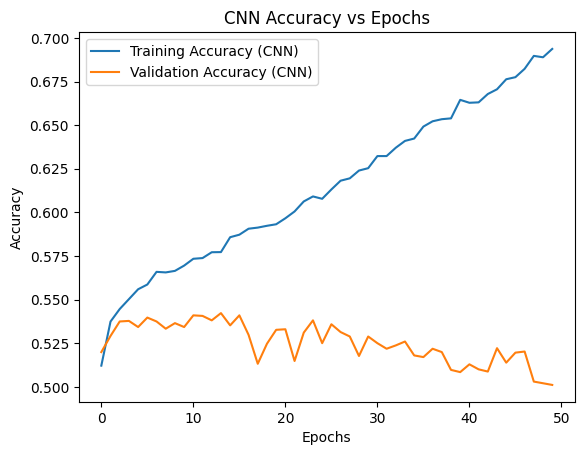

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5073 - loss: 1.5125
CNN Test Accuracy: 0.5011164546012878


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('ECG_Cardiac_Features_Cleaned.csv')

y = data_cleaned[['CD', 'HYP', 'MI', 'NORM', 'STTC']]

X = data_cleaned.drop(columns=[ 'CD', 'HYP', 'MI', 'NORM', 'STTC'])

# Ensure y is correctly one-hot encoded, each label column should be binary, and concatenate them into one-hot
y = to_categorical(y.values.argmax(axis=1), num_classes=5)  # one-hot encode the labels (class 0-4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input for CNN (add an extra dimension for channels)
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# ---- CNN Model ----
model_cnn = Sequential()
model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 3, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(5, activation='softmax'))  # 5 output classes (softmax for multi-class classification)

model_cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model and store the history
history_cnn = model_cnn.fit(X_train_scaled_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled_cnn, y_test))

# Plot the accuracy graph for CNN
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy (CNN)')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.title('CNN Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the CNN model
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_scaled_cnn, y_test)
print(f"CNN Test Accuracy: {test_accuracy_cnn}")

Epoch 1/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7150 - loss: 0.7593 - val_accuracy: 0.4909 - val_loss: 1.5570
Epoch 2/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7052 - loss: 0.7649 - val_accuracy: 0.4973 - val_loss: 1.5851
Epoch 3/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7170 - loss: 0.7531 - val_accuracy: 0.4957 - val_loss: 1.5539
Epoch 4/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7238 - loss: 0.7348 - val_accuracy: 0.5005 - val_loss: 1.5874
Epoch 5/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7259 - loss: 0.7280 - val_accuracy: 0.4957 - val_loss: 1.6197
Epoch 6/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7228 - loss: 0.7307 - val_accuracy: 0.4995 - val_loss: 1.6457
Epoch 7/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7256 - loss: 0.7282 - val_accuracy: 0.4775 - val_loss: 1.6663
Epoch 8/50
392/392 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7295 - loss: 0.7100 - val_accuracy: 0.

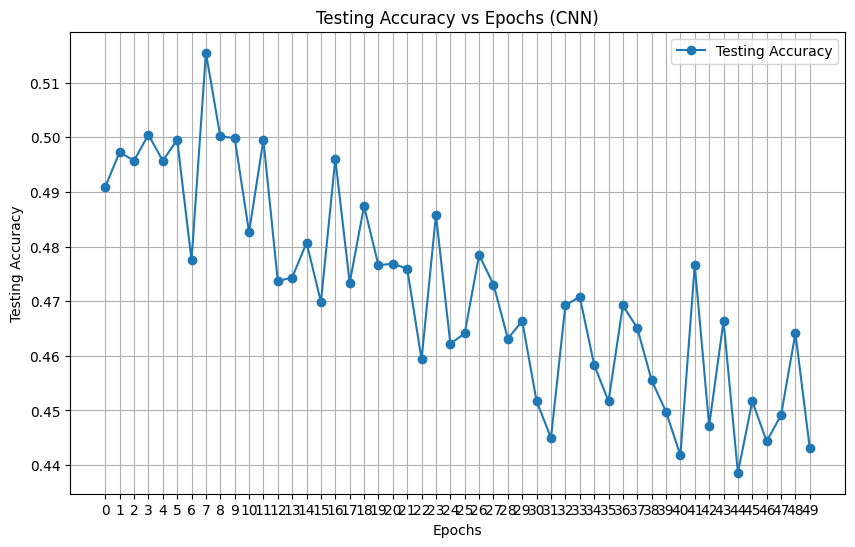

In [32]:
test_accuracies = []  # To store test accuracy after each epoch

# Custom training loop to calculate testing accuracy per epoch
for epoch in range(50):
    print(f"Epoch {epoch + 1}/{50}")
    model_cnn.fit(
        X_train_scaled_cnn, y_train,
        epochs=1,  # Train one epoch at a time
        batch_size=32,
        validation_data=(X_test_scaled_cnn, y_test),
        verbose=1
    )
    
    # Evaluate the model on the testing set after this epoch
    _, test_accuracy = model_cnn.evaluate(X_test_scaled_cnn, y_test, verbose=0)
    test_accuracies.append(test_accuracy)

# Plot the testing accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Testing Accuracy vs Epochs (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.xticks(range(50))  # Mark each epoch on the x-axis
plt.legend()
plt.grid()
plt.show()

Training Logistic Regression...
Training Lasso...
Training SVM (Linear)...
Training KNN...
Training Random Forest...
Training Decision Tree...
Training XGBoost...


c:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


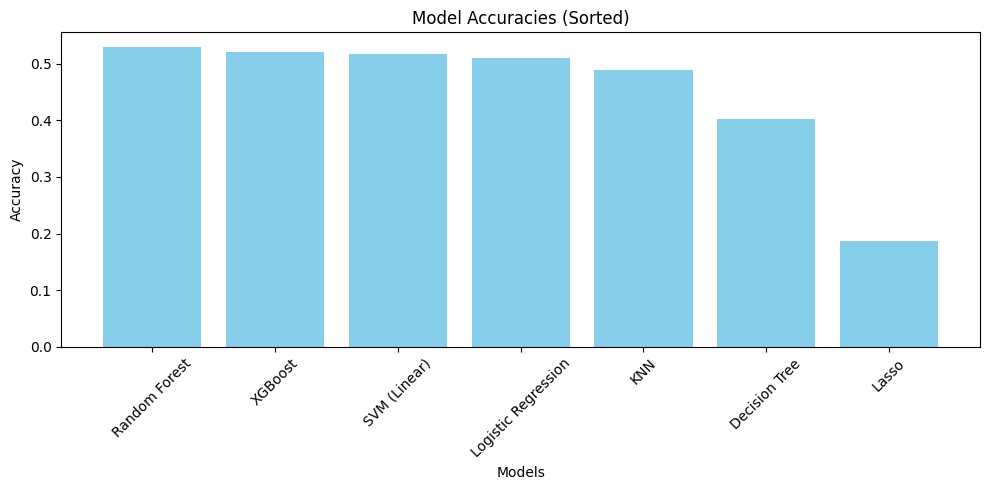

Feature importance mismatch for Logistic Regression. Skipping plot.


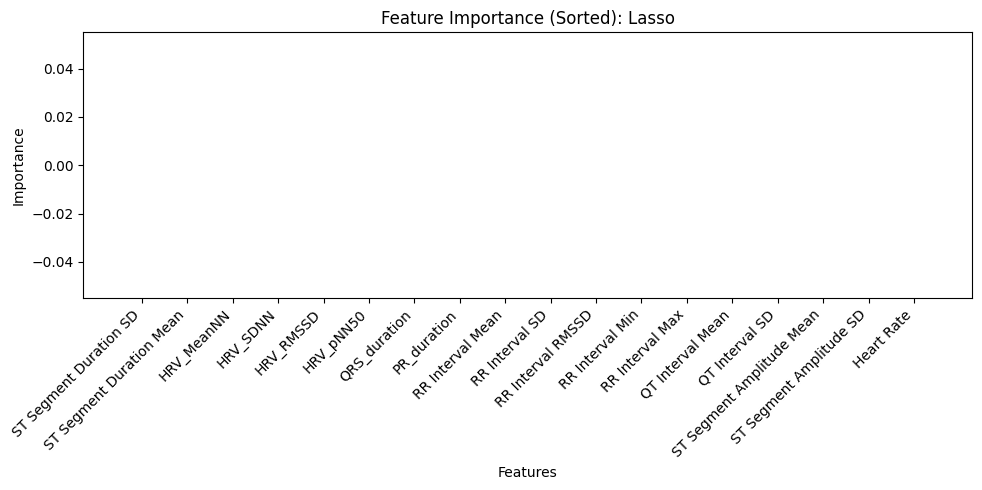

Feature importance mismatch for SVM (Linear). Skipping plot.


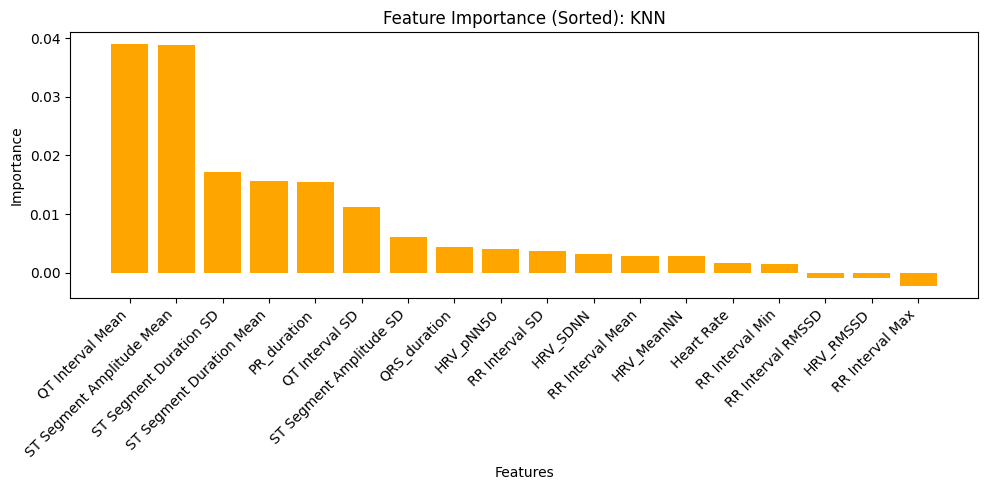

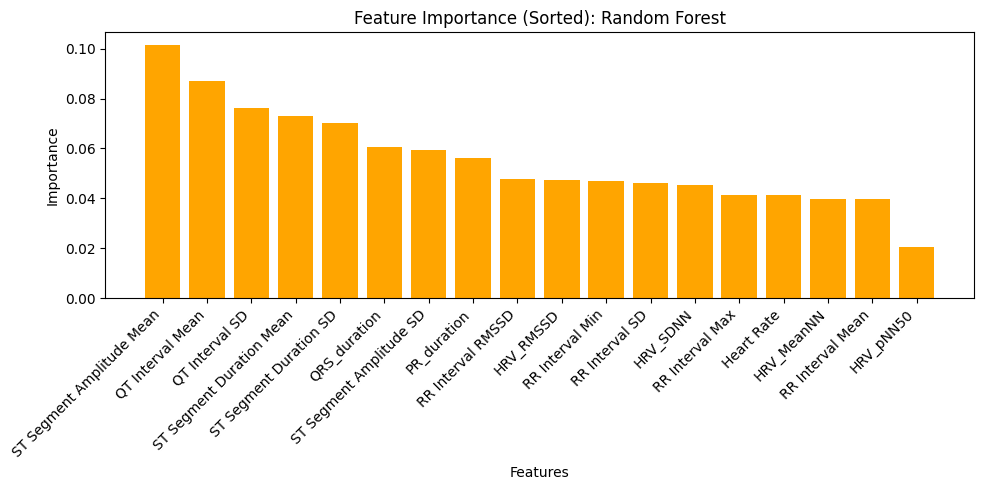

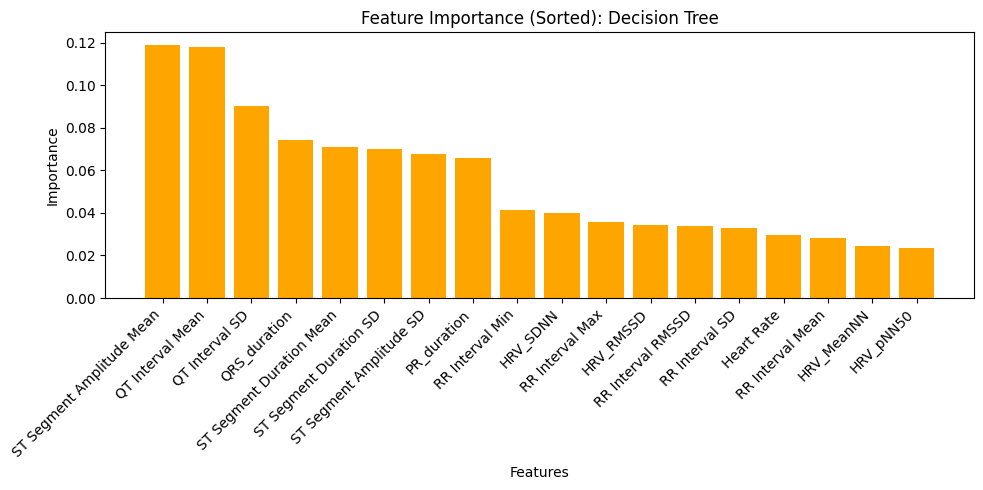

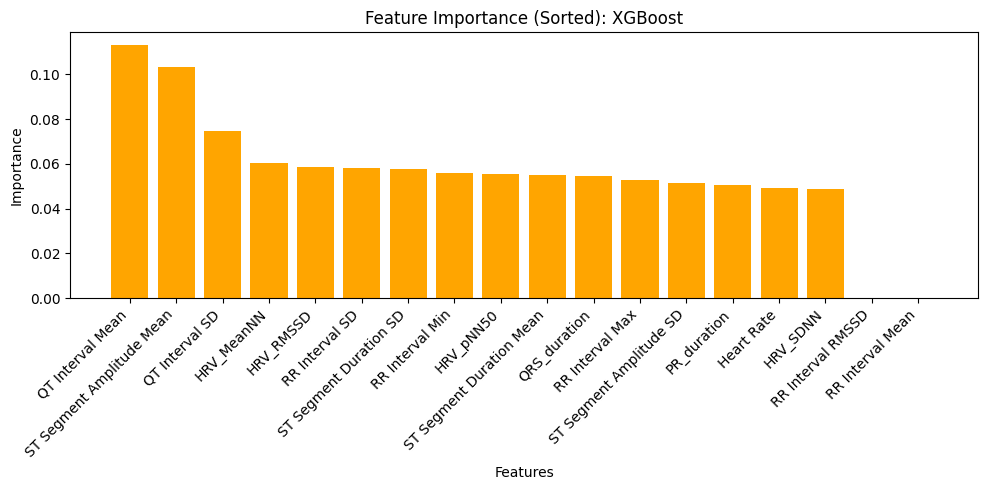


Model Accuracies (Sorted):
Random Forest: 0.5289
XGBoost: 0.5212
SVM (Linear): 0.5174
Logistic Regression: 0.5094
KNN: 0.4896
Decision Tree: 0.4022
Lasso: 0.1863


In [34]:
y_train_labels = np.argmax(y_train, axis=1)  # Convert one-hot to class labels
y_test_labels = np.argmax(y_test, axis=1)    # Convert one-hot to class labels

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Lasso': Lasso(),
    'SVM (Linear)': SVC(kernel='linear', probability=True),  # Ensure probability estimates are available
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
}

# Train and evaluate each model
accuracies = {}
feature_importances = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train_labels)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Ensure y_pred is in the correct format for classification (discrete class labels)
    if isinstance(y_pred[0], np.float64):  # If predictions are continuous (e.g., for regression models)
        y_pred = np.round(y_pred).astype(int)

    # Accuracy calculation
    accuracies[name] = accuracy_score(y_test_labels, y_pred)
    
    # Feature importance calculation
    if hasattr(model, "feature_importances_"):  # For tree-based models
        feature_importances[name] = model.feature_importances_
    elif hasattr(model, "coef_"):  # For linear models
        feature_importances[name] = np.abs(model.coef_).flatten()
    else:  # For models like SVM or KNN, use permutation importance
        result = permutation_importance(model, X_test_scaled, y_test_labels, n_repeats=10, random_state=42)
        feature_importances[name] = result.importances_mean

sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
sorted_model_names = [model[0] for model in sorted_accuracies]
sorted_accuracy_values = [model[1] for model in sorted_accuracies]

# Plotting accuracies
plt.figure(figsize=(10, 5))
plt.bar(sorted_model_names, sorted_accuracy_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies (Sorted)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting feature importances for each model in decreasing order
for name, importance in feature_importances.items():
    if len(importance.shape) > 1:  # Flatten for multi-dimensional outputs
        importance = importance.flatten()
    
    # Sorting feature importance and their corresponding feature names
    if len(importance) == len(X_train.columns):
        sorted_indices = np.argsort(importance)[::-1]  # Sort indices in descending order
        sorted_importance = importance[sorted_indices]
        sorted_features = np.array(X_train.columns)[sorted_indices]

        # Plot the sorted feature importance
        plt.figure(figsize=(10, 5))
        plt.bar(sorted_features, sorted_importance, color='orange')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.title(f'Feature Importance (Sorted): {name}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature importance mismatch for {name}. Skipping plot.")

# Print accuracies for all models
print("\nModel Accuracies (Sorted):")
for name, acc in sorted_accuracies:
    print(f"{name}: {acc:.4f}")

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=42, 
                      solver='adam', activation='relu', warm_start=True, validation_fraction=0.1)

# Train the model and record the training accuracy
train_accuracies = []
for _ in range(1, 501):  # Training over 500 epochs
    model.max_iter = _
    model.fit(X_train_scaled, y_train)
    # Compute the training accuracy at the current epoch
    train_accuracy = model.score(X_train_scaled, y_train)
    train_accuracies.append(train_accuracy)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Plot the training accuracy
plt.plot(range(1, 501), train_accuracies)
plt.title('MLPClassifier Training Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()